<a href="https://colab.research.google.com/github/swalehaparvin/Feature_Importance/blob/main/Feature_Importance_(Explainable_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Build a decision tree classifier to classify income levels based on multiple features including age, education level, and hours worked per week, and extract the learned rules that explain the decision. Then, compare its performance with an MLPClassifier trained on the same data.

In [ ]:
pip install pandas scikit-learn numpy


Step 1: We'll use the Adult Income Dataset (from UCI ML Repository), which contains features like age, education, hours-per-week, and predicts whether income exceeds <=50K or >50K

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset (download from UCI or use fetch_openml)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

# Drop missing values and irrelevant columns
data.dropna(inplace=True)
data.drop(['fnlwgt', 'education-num', 'native-country'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Encode target variable (income)
label_encoder = LabelEncoder()
data_encoded['income'] = label_encoder.fit_transform(data_encoded['income'])

# Split into features (X) and target (y)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 2: Train a Decision Tree and Extract Rules

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Extract decision rules
tree_rules = export_text(dt, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Rules:
 |--- marital-status_Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7139.50
|   |   |--- hours-per-week <= 44.50
|   |   |   |--- capital-loss <= 2218.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-loss >  2218.50
|   |   |   |   |--- class: 0
|   |   |--- hours-per-week >  44.50
|   |   |   |--- age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  37.50
|   |   |   |   |--- class: 0
|   |--- capital-gain >  7139.50
|   |   |--- age <= 20.00
|   |   |   |--- class: 0
|   |   |--- age >  20.00
|   |   |   |--- capital-gain <= 7669.50
|   |   |   |   |--- class: 1
|   |   |   |--- capital-gain >  7669.50
|   |   |   |   |--- class: 1
|--- marital-status_Married-civ-spouse >  0.50
|   |--- capital-gain <= 5095.50
|   |   |--- capital-loss <= 1782.50
|   |   |   |--- education_Bachelors <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- education_Bachelors >  0.50
|   |   |   |   |--- class: 1
|   |   |--- capital-loss >  1782.50
|   |

Step 3: Train an MLPClassifier and Compare

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate MLP
y_pred_mlp = mlp.predict(X_test_scaled)
print("\nMLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.8179957006858429
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7455
           1       0.62      0.61      0.61      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



## Key Takeaways

### **Decision Tree vs. MLP (Multilayer Perceptron) Classifier**  

Both **Decision Trees** and **MLPs (a type of Neural Network)** are supervised learning algorithms, but they differ significantly in structure, interpretability, and use cases.  

---

## **1. Decision Tree Classifier**  
### **How It Works**  
- Splits data into branches based on feature values (using criteria like Gini impurity or entropy).  
- Forms a tree-like structure of decisions until reaching leaf nodes (predictions).  

### **Pros**  
✅ **Interpretable** – Easy to visualize and explain (unlike neural networks).  
✅ **Handles non-linear data** – No need for feature scaling.  
✅ **Works well with small datasets** – Less prone to overfitting than MLPs on small data.  
✅ **Handles mixed data types** – Works with numerical and categorical features.  

### **Cons**  
❌ **Prone to overfitting** – Deep trees memorize noise (requires pruning or ensembling like Random Forest).  
❌ **Unstable** – Small data changes can alter tree structure.  
❌ **Struggles with complex patterns** – May not capture intricate relationships as well as MLPs.  

### **When to Use?**  
✔️ Need a **simple, explainable model** (e.g., business rules, regulatory compliance).  
✔️ **Small to medium datasets** where deep learning would overfit.  
✔️ **Non-linear relationships** but not highly complex patterns.  

---

## **2. MLP (Multilayer Perceptron) Classifier**  
### **How It Works**  
- A **neural network** with input, hidden, and output layers.  
- Uses **backpropagation** and gradient descent to optimize weights.  
- Applies **activation functions** (ReLU, sigmoid, tanh) for non-linearity.  

### **Pros**  
✅ **Handles complex patterns** – Can model highly non-linear relationships.  
✅ **Works well with large datasets** – Improves performance with more data.  
✅ **Feature learning** – Automatically extracts useful features (unlike decision trees).  

### **Cons**  
❌ **Black-box model** – Hard to interpret (not suitable for explainable AI).  
❌ **Requires feature scaling** – Sensitive to input ranges (e.g., StandardScaler needed).  
❌ **Computationally expensive** – Slower training than decision trees.  
❌ **Hyperparameter-sensitive** – Needs tuning (layers, neurons, learning rate).  

### **When to Use?**  
✔️ **Large datasets** where deep learning excels.  
✔️ **High-dimensional data** (e.g., images, text) where feature extraction matters.  
✔️ **Complex decision boundaries** that trees struggle with.  

---

## **Comparison Summary**  

| **Factor**            | **Decision Tree** | **MLP (Neural Network)** |
|-----------------------|------------------|------------------------|
| **Interpretability**  | ✅ High          | ❌ Low (Black-box)     |
| **Handles Non-linearity** | ✅ Yes | ✅ Yes (Better) |
| **Feature Scaling Needed?** | ❌ No | ✅ Yes |
| **Works with Small Data?** | ✅ Yes | ❌ No (Overfits) |
| **Training Speed** | ⚡ Fast | 🐢 Slow (GPU helps) |
| **Overfitting Risk** | High (needs pruning) | Medium (needs regularization) |
| **Best for Tabular Data?** | ✅ Yes | ⚠️ Depends (often worse than trees/ensembles) |
| **Best for Images/Text?** | ❌ No | ✅ Yes |

---

## **Which One to Choose?**  

### **Use Decision Tree (or Random Forest) if:**  
- You need **explainability** (e.g., business decisions).  
- Dataset is **small or medium-sized**.  
- Data is **tabular** (structured, like CSV files).  

### **Use MLP (Neural Network) if:**  
- You have **large amounts of data**.  
- Problem involves **complex patterns** (e.g., image recognition, NLP).  
- **Feature engineering is difficult** (MLPs learn features automatically).  

### **Hybrid Approach?**  
- For tabular data, **tree-based models (Random Forest, XGBoost)** often outperform MLPs.  
- For unstructured data (images, text), **deep learning (MLP, CNN, RNN)** is better.  

Would you like a code example comparing the two on a specific dataset? 🚀

# Computing feature impact with linear regression

The task is to build and explain a linear regression model that estimates insurance charges based on features like age, BMI, and smoking status by analyzing the model's coefficients to determine the impact of each feature on the predictions.

In [5]:
!pip install kagglehub
from google.colab import files
files.upload()

Saving insurance.csv to insurance (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [6]:
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")

# Find the CSV file (there should be only one)
import os

# List all files in the downloaded folder
files = os.listdir(path)
print("Files in dataset:", files)

# Load the CSV file (assuming it's called insurance.csv)
csv_path = os.path.join(path, "insurance.csv")
df = pd.read_csv(csv_path)

# Preview the dataset
print(df.head())


Files in dataset: ['insurance.csv']
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' from cell cUusB9EqxQwO is available

# Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Preprocess: Scale numeric & encode categorical
numeric_features = ['age', 'bmi']
categorical_features = ['smoker', 'sex', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added train-test split

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) # Transform test data using the scaler fitted on training data

In [ ]:
# Alternative loading method
from sklearn.datasets import fetch_openml
data = fetch_openml(name='insurance', version=1, as_frame=True).frame

In [ ]:
# Check all available columns
print("All columns in data:", data.columns.tolist())

# Verify specific columns exist
print("BMI column exists?", 'bmi' in data.columns)

All columns in data: ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
BMI column exists? False


Normalize the training data X_train.

Fit the linear regression model to the standardized training data.

Extract the coefficients from the model.

Plot the coefficients for the given feature_names.

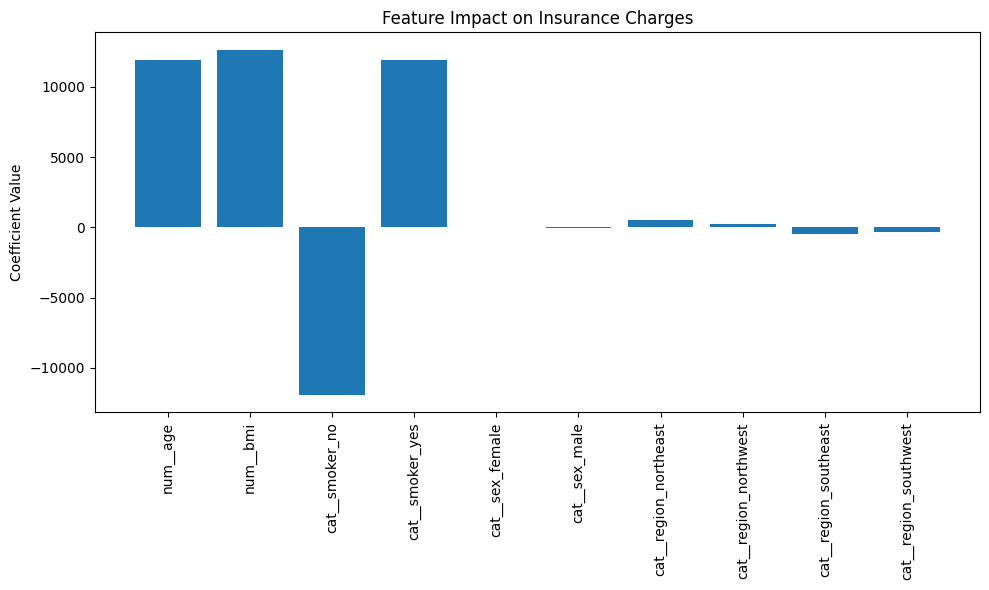

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Derive coefficients
coefficients = model.coef_

# Get feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Feature Impact on Insurance Charges')
plt.tight_layout()
plt.show()

Analyze the model to determine the relevant factors influencing smoking status, helping the company assess risk more accurately and tailor insurance policies accordingly.

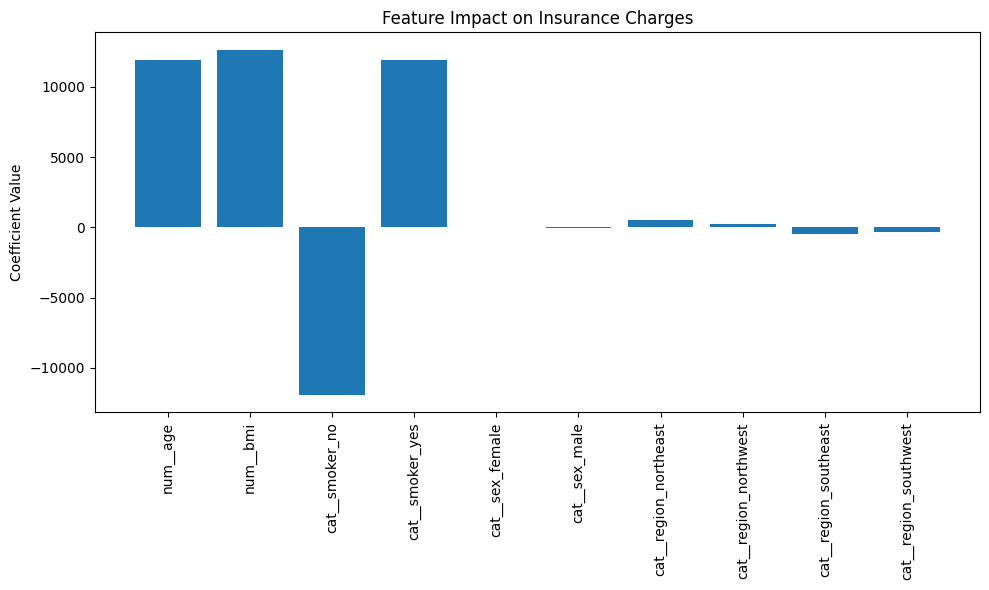

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use Linear Regression for continuous target
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # y_train should be 'charges'

# Get coefficients
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Feature Impact on Insurance Charges')
plt.tight_layout()
plt.show()

# Computing feature importance with decision trees

Accuracy: 0.8142

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7455
           1       0.61      0.60      0.61      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



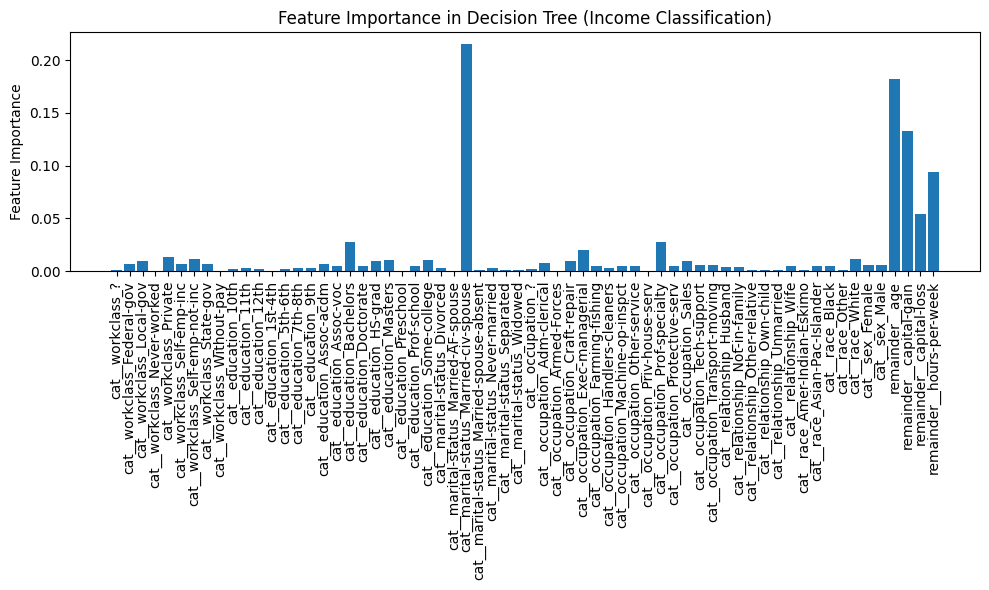

In [22]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Create and train the decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train) # Use X_train and y_train from the previous cell

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) # Use y_test from the previous cell
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
feature_names = preprocessor.get_feature_names_out()
feature_importance = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

## Computing feature importance with random forests

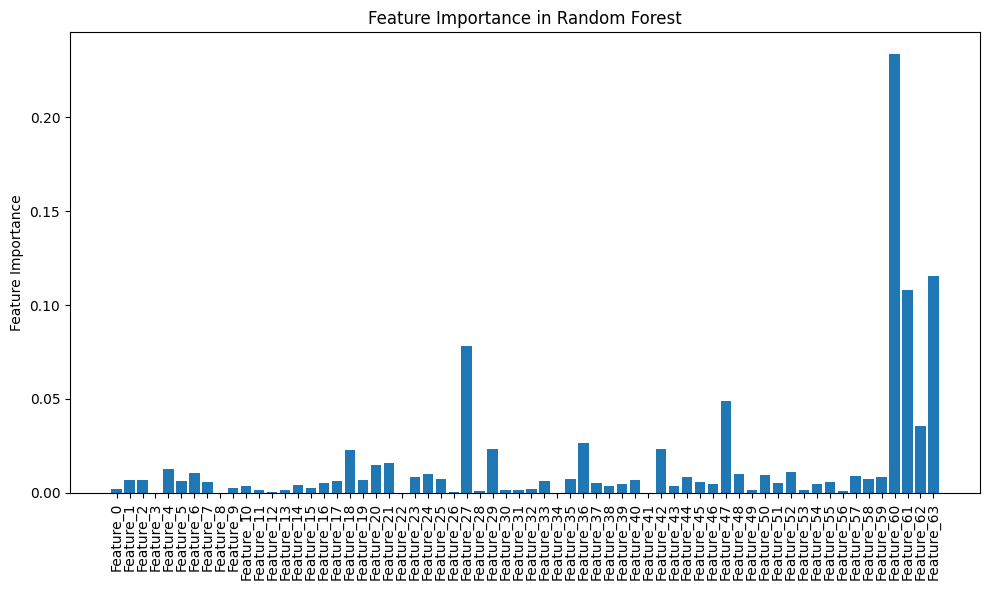

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create generic feature names (adjust the number based on your features)
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

### **Differences in Feature Importance: Random Forests vs. Decision Trees vs. Linear Regression**  

#### **1. Decision Trees**  
- **How it works:**  
  - Measures importance based on how much a feature reduces impurity (Gini/entropy for classification, MSE for regression) when splitting data.  
  - Importance = (Total impurity reduction by the feature) / (Total impurity reduction by all features).  
- **Pros:**  
  - Simple and interpretable (easy to visualize in a single tree).  
- **Cons:**  
  - **Unstable**—small changes in data can lead to very different importance rankings.  
  - **Biased toward high-cardinality features** (e.g., continuous variables often appear more important than categorical ones).  

#### **2. Random Forests**  
- **How it works:**  
  - Averages feature importance across **many decision trees**, each trained on random subsets of data and features (bagging).  
  - Also considers **out-of-bag (OOB) error**—if shuffling a feature increases error, it’s deemed important.  
- **Pros:**  
  - **More stable and reliable** than single decision trees (reduces overfitting bias).  
  - Handles **non-linear relationships** well.  
- **Cons:**  
  - Can still **overemphasize correlated features** (if two features are similar, their importance may be split).  
  - Computationally slower than a single tree.  

#### **3. Linear Regression**  
- **How it works:**  
  - Importance is derived from **coefficient magnitudes** (for standardized features) or **p-values** (statistical significance).  
  - Assumes a **linear relationship** between features and target.  
- **Pros:**  
  - Provides **direct interpretability** (e.g., "a 1-unit increase in X increases Y by β").  
  - Works well when relationships are truly linear.  
- **Cons:**  
  - **Fails with non-linear relationships** (e.g., interactions, thresholds).  
  - **Misleading if features are correlated** (multicollinearity inflates variance of coefficients).  

---

### **Which Method Works Best?**  
| **Scenario**                     | **Best Method**               | **Why?** |
|----------------------------------|-------------------------------|----------|
| **Linear relationships**         | Linear Regression             | Coefficients directly quantify feature impact. |
| **Non-linear relationships**     | Random Forest                 | Captures complex interactions; more stable than single trees. |
| **Need interpretability**        | Decision Tree (if simple)     | Easy to visualize in a single tree. |
| **High-dimensional data**        | Random Forest                 | Handles many features robustly. |
| **Correlated features**          | Random Forest (with caution)  | Better than linear regression but may still split importance between correlated features. |
| **Statistical inference needed** | Linear Regression (with p-values) | Tests hypotheses about feature significance. |

### **Key Takeaways**  
- **Random Forests** are generally the **most reliable** for feature importance in real-world data (handles non-linearity, robust to noise).  
- **Linear Regression** is best **only if relationships are linear** (and features are uncorrelated).  
- **Single Decision Trees** are **unstable**—useful for quick insights but not for final decisions.  